In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


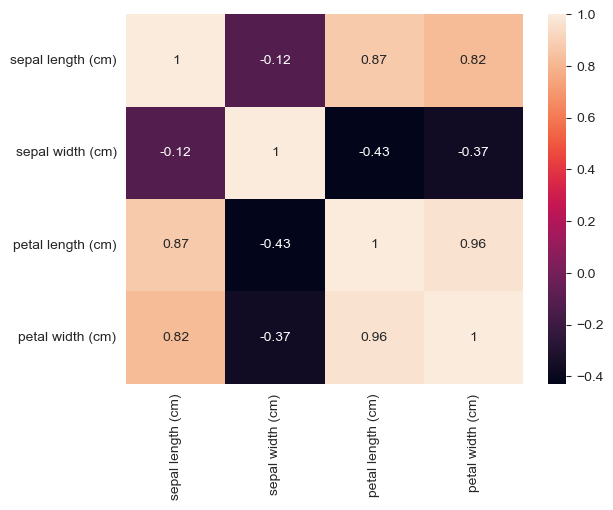

In [15]:
# Check the correlation of the features
sns.heatmap(iris_df.corr(), annot=True)
plt.show()

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


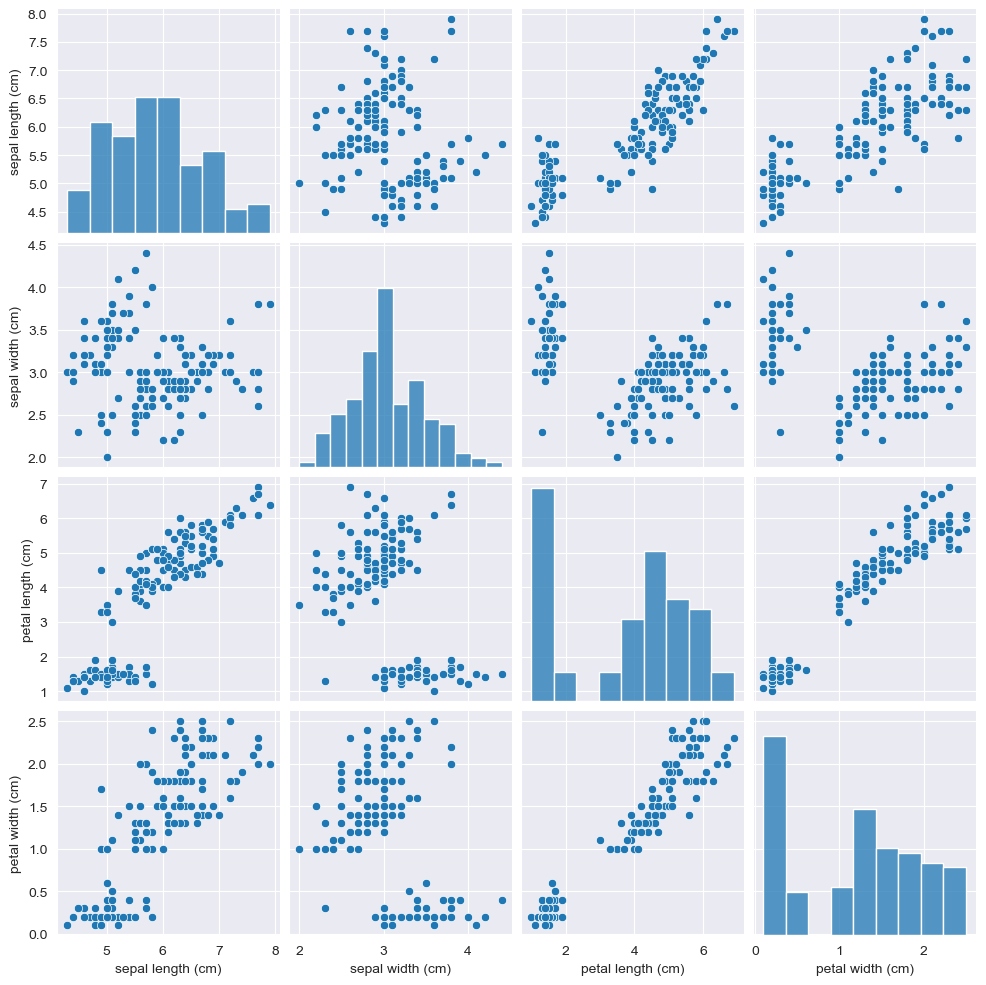

In [20]:
sns.pairplot(data=iris_df)
plt.show()

In [6]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(iris_df, test_size=0.25, random_state=42)

In [17]:
# Fit the data to the algorithm and check for the best number of clusters
from sklearn.cluster import KMeans

rng = range(1, 10)
inertias = []

for i in rng:
    model = KMeans(n_clusters=i)
    model.fit(X_train)
    inertias.append(model.inertia_)

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

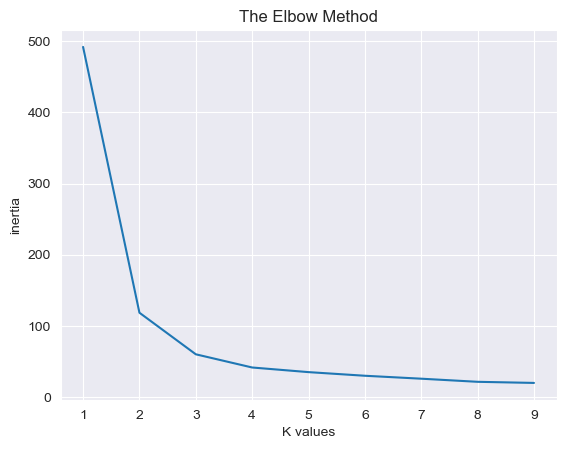

In [18]:
# Elbow method
sns.set_style('darkgrid')
sns.lineplot(x=rng, y=inertias)
plt.xlabel('K values')
plt.ylabel('inertia')
plt.title('The Elbow Method')
plt.show()

In [23]:
# Predict the labels for the test set
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_train)
labels = model.predict(X_test)

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [74]:
# Rename the model labels
cluster_names_dict = {
    0: 'Virginica',
    1: 'Versicolor',
    2: 'Setosa'
}
cluster_names_train = [cluster_names_dict[label] for label in model.labels_]
cluster_names_test = [cluster_names_dict[label] for label in labels]

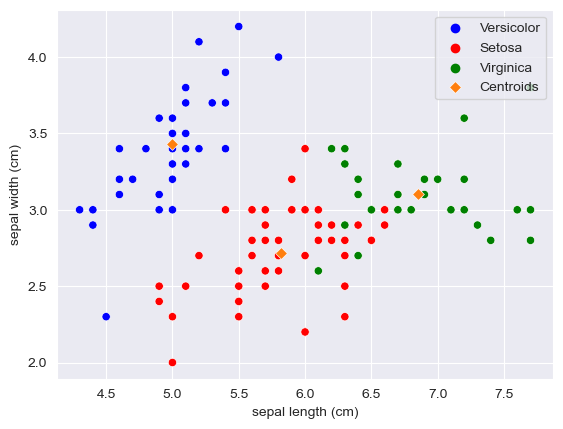

In [78]:
# Plot the clusters of the train data
sns.scatterplot(x='sepal length (cm)',
                y='sepal width (cm)',
                data=X_train,
                hue=cluster_names_train,
                palette=['blue', 'red', 'green'])
sns.scatterplot(x=model.cluster_centers_[:, 0],
                y=model.cluster_centers_[:, 1],
                marker='D',
                label='Centroids')
plt.legend(loc='upper right')
plt.show()

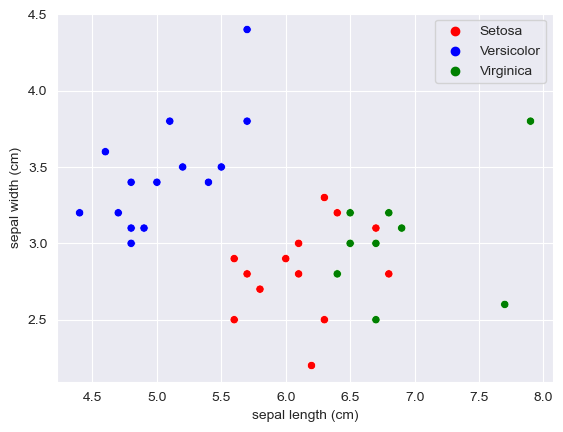

In [76]:
# Plot the clusters of the test data
sns.scatterplot(x='sepal length (cm)',
                y='sepal width (cm)',
                data=X_test,
                hue=cluster_names_test,
                palette=['red', 'blue', 'green'])
plt.show()